# New York Metro Area AQI Analysis during Covid 19

# Objective

#### An analysis of air quality changes in four metropolitan areas during the initial Covid 19 onset.  Metro areas of analysis include the greater San Francisco, CA; New York City, NY; Los Angeles, CA; and Salt Lake City, UT areas.  Analysis explores the location and trends of daily AQI during the respective Covid lockdown periods compared to the AQI during the same months in years prior.

#### Covid-19 Restriction Start Dates
 - San Francisco: **March 17, 2020**
 - Los Angeles: 
 - New York-Newark-Jersey City: 
 - Salt Lake City: 

In [174]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely.geometry import Point, Polygon


In [63]:
# US daily AQI data from 1980-01-01 to 2021-05-18
aqi_cbsa=pd.read_csv('data/aqi_cbsa_df.csv')

# set columns to strings to keep leading zeros
dtype_dic= {'State Code':str,
            'County Code':str,
            'Site Number':str}

# AQI monitor locations
monitors=pd.read_csv('data/aqs_monitors.csv', usecols ={'State Code',
                                                        'County Code',
                                                        'Site Number',
                                                        'Latitude',
                                                        'Longitude',
                                                        'Monitor Type'},
                    dtype=dtype_dic)

In [82]:
# combine columns together to get site number
monitors['Defining Site']=(monitors['State Code']+'-'+
                           monitors['County Code']+'-'+
                           monitors['Site Number'])

In [32]:
monitors.head()

,State Code,County Code,Site Number,Latitude,Longitude,Monitor Type,Defining Site
0,01,001,0001,32.437458,-86.472891,OTHER,01-001-0001
1,01,001,0001,32.437458,-86.472891,OTHER,01-001-0001
2,01,001,0002,32.428470,-86.443585,SLAMS,01-001-0002
3,01,001,0002,32.428470,-86.443585,SLAMS,01-001-0002
4,01,001,0003,32.332659,-86.791521,OTHER,01-001-0003


In [68]:
# data types of columns
print(monitors.dtypes)
print("")
print(aqi_cbsa.dtypes)

State Code       object
County Code      object
Site Number      object
Latitude        float64
Longitude       float64
Monitor Type     object
dtype: object

Unnamed: 0                    int64
CBSA                         object
CBSA Code                     int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object


In [83]:
# select CBSAs to compare
cbsa_loc = ['Los Angeles-Long Beach-Anaheim, CA',
            'New York-Newark-Jersey City, NY-NJ-PA',
            'Salt Lake City, UT', 
            'San Francisco-Oakland-Hayward, CA']

cbsa=aqi_cbsa.loc[aqi_cbsa['CBSA'].isin(cbsa_loc)]
cbsa['CBSA'].unique()

array(['New York-Newark-Jersey City, NY-NJ-PA', 'Salt Lake City, UT',
       'Los Angeles-Long Beach-Anaheim, CA',
       'San Francisco-Oakland-Hayward, CA'], dtype=object)

### Merge dataframes

In [188]:
cbsa_comb = cbsa.merge(monitors, on='Defining Site', how='left').drop_duplicates(ignore_index=True)

In [190]:
# format date as datetime
cbsa_comb['Date']=pd.to_datetime(cbsa_comb['Date'], format = '%Y-%m-%d')

In [191]:
# convert Category column to category data type
cbsa_comb['Category']=cbsa_comb.Category.astype('category')

In [192]:
cbsa_df.dtypes

Unnamed: 0                            int64
CBSA                                 object
CBSA Code                             int64
Date                         datetime64[ns]
AQI                                   int64
Category                           category
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
State Code                           object
County Code                          object
Site Number                          object
Latitude                            float64
Longitude                           float64
Monitor Type                         object
geometry                           geometry
dtype: object

# Plot data

### Subset AQI datasets

In [ ]:
lax = cbsa_df[cbsa_df['CBSA'].str.contains("Los Angeles")]
sf = cbsa_df[cbsa_df['CBSA'].str.contains("San Francisco")]
slc = cbsa_df[cbsa_df['CBSA'].str.contains("Salt Lake")]
nyc = cbsa_df[cbsa_df['CBSA'].str.contains("New York")]

### Create geodataframe 

In [213]:
# convert to geodataframe
geoms=gpd.points_from_xy(cbsa_comb['Longitude'], cbsa_comb['Latitude'], crs='EPSG:4326')

cbsa_df=gpd.GeoDataFrame(cbsa_comb,geometry=geoms)

### Location of Monitoring Stations

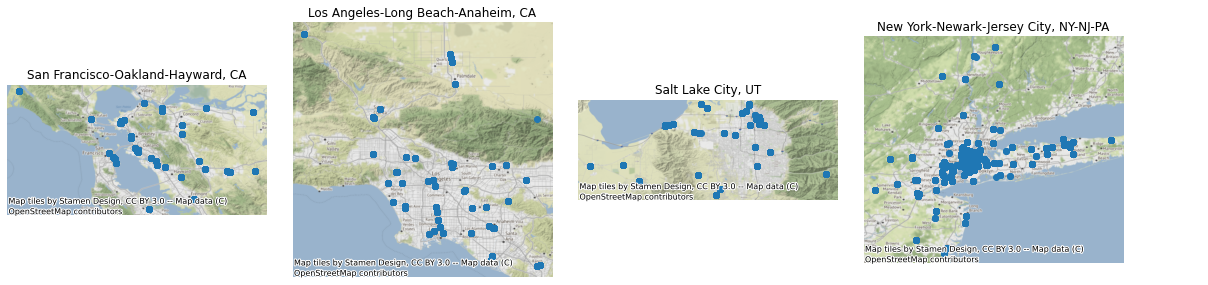

In [239]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1.set_title('San Francisco-Oakland-Hayward, CA')
ax2.set_title('Los Angeles-Long Beach-Anaheim, CA')
ax3.set_title('Salt Lake City, UT')
ax4.set_title('New York-Newark-Jersey City, NY-NJ-PA')

sf['geometry'].plot(ax=ax1)
lax['geometry'].plot(ax=ax2)
slc['geometry'].plot(ax=ax3)
nyc['geometry'].plot(ax=ax4)

cx.add_basemap(ax1, crs=4326)
cx.add_basemap(ax2, crs=4326)
cx.add_basemap(ax3, crs=4326)
cx.add_basemap(ax4, crs=4326)

for ax in (ax1,ax2,ax3,ax4):
    ax.axis('off')

In [156]:
color_type={'Good': 'green',
            "Moderate":'gold',
            "Unhealthy for Sensitive Groups":'orange',
            "Unhealthy":'red',
            "Very Unhealthy":'purple',
            "Hazardous":'maroon'}

#### Los Angeles

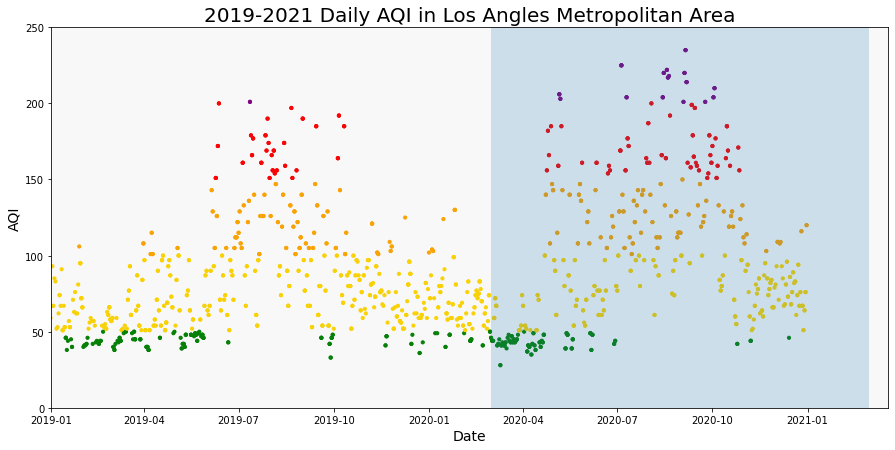

In [161]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(lax['Date'], lax['AQI'], c=lax['Category'].apply(lambda x: color_type[x]), s=10)
ax.axhspan(0,500, facecolor="grey", alpha=0.05)

plt.title('2019-2021 Daily AQI in Los Angles Metropolitan Area', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xlim([np.datetime64('2019-01-01'), np.datetime64('2021-03-20')])
plt.ylim(0,250)

plt.axvspan(np.datetime64('2020-03-01'), np.datetime64('2021-03-01'), alpha=0.2)


#### New York-Newark-Jersey City

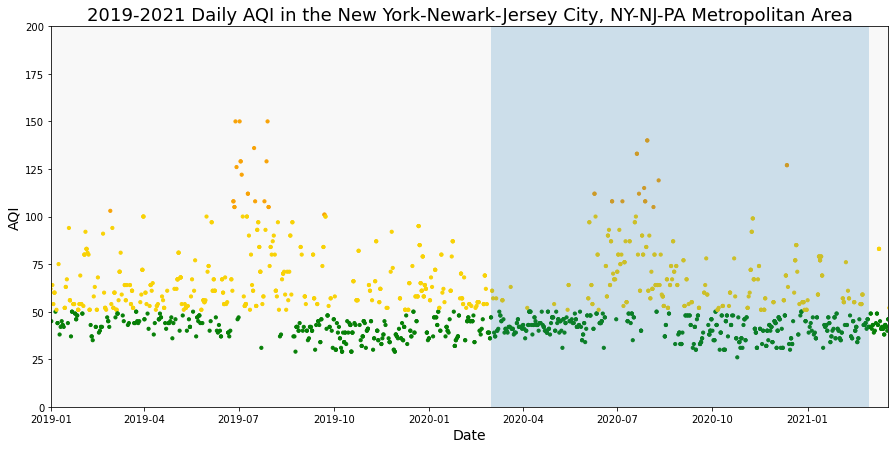

In [187]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(nyc['Date'], nyc['AQI'], c=nyc['Category'].apply(lambda x: color_type[x]), s=10)
ax.axhspan(0,500, facecolor="grey", alpha=0.05)

plt.title('2019-2021 Daily AQI in the New York-Newark-Jersey City, NY-NJ-PA Metropolitan Area', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xlim([np.datetime64('2019-01-01'), np.datetime64('2021-03-20')])
plt.ylim(0,200)

plt.axvspan(np.datetime64('2020-03-01'), np.datetime64('2021-03-01'), alpha=0.2)


### San Francisco

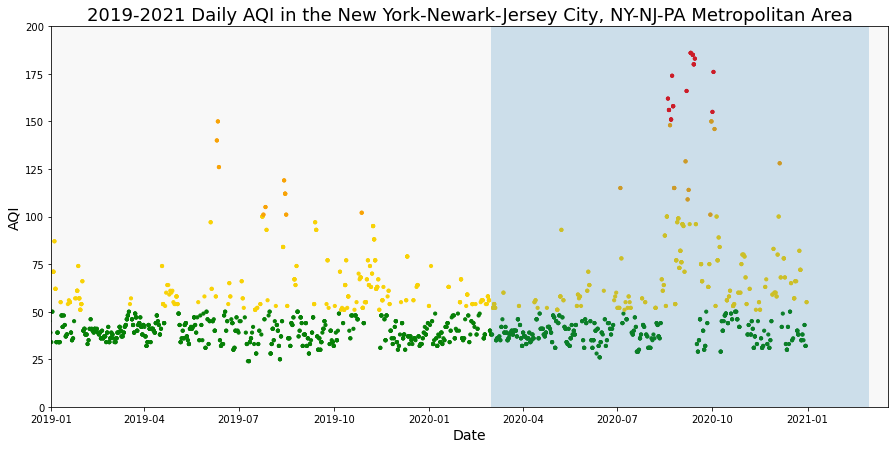

In [199]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(sf['Date'], sf['AQI'], c=sf['Category'].apply(lambda x: color_type[x]), s=10)
ax.axhspan(0,500, facecolor="grey", alpha=0.05)

plt.title('2019-2021 Daily AQI in the New York-Newark-Jersey City, NY-NJ-PA Metropolitan Area', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xlim([np.datetime64('2019-01-01'), np.datetime64('2021-03-20')])
plt.ylim(0,200)

plt.axvspan(np.datetime64('2020-03-01'), np.datetime64('2021-03-01'), alpha=0.2)

#### Salt Lake City

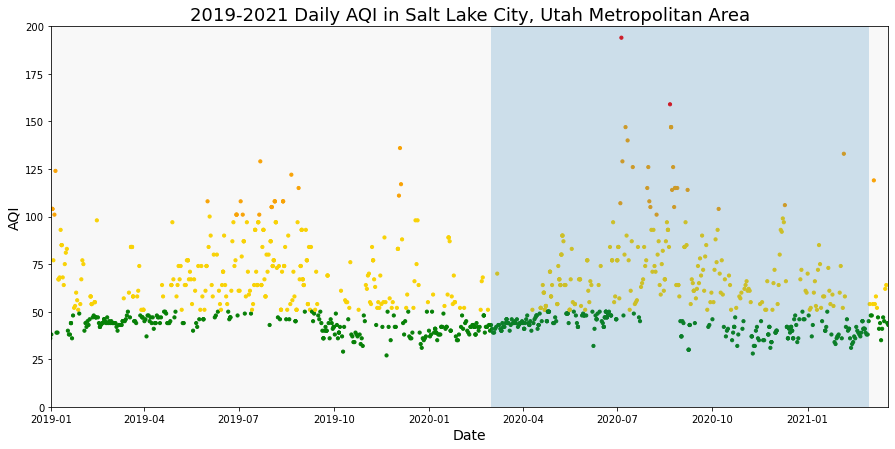

In [162]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(slc['Date'], slc['AQI'], c=slc['Category'].apply(lambda x: color_type[x]), s=10)
ax.axhspan(0,500, facecolor="grey", alpha=0.05)

plt.title('2019-2021 Daily AQI in Salt Lake City, Utah Metropolitan Area', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xlim([np.datetime64('2019-01-01'), np.datetime64('2021-03-20')])
plt.ylim(0,200)

plt.axvspan(np.datetime64('2020-03-01'), np.datetime64('2021-03-01'), alpha=0.2)